# Chapter 8 - Dimensionality Reduction

## Curse of Dimensionality
- Too much data can lead to slow training times. This is method that improves performance.
    - May be better to train with full set of data since data is lost, and accuracy performance may suffer.
- Very useful for visualization as it's possible to distill many dimensions into what's understandable by human visual cortex.
- Hi dim space behaviors
    - 0.4% chance of being in extreme location in 1x1 square. Extreme being 0.001 units from border.
    - Almost certain chance to be in extreme location in 10,000 dim space. Most points in high dims close to border.
    
## Main Approaches for Dimensionality Reduction
### Projection
- For example, take a 3D set of points and project them onto a 2D plane that intersects as many of them as possible.

### Manifold Learning
- Two ways of looking at this: 1) Taking a higher dimensional object, and one can find a Euclidean chart in it. 2) A nD object that can be twisted and folded into a higher dimension. Something like a mapping from one dimension's coordinate space onto another?

### PCA
- Identifies the hyperplane closest to the data, then projects onto it. 

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

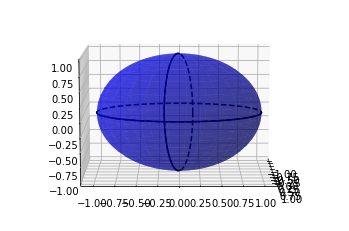

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
#for i in range(2):
#    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
elev = 10.0
rot = 80.0 / 180 * np.pi
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
#calculate vectors for "vertical" circle
a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
b = np.array([0, 1, 0])
b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (1 - np.cos(rot))
ax.plot(np.sin(u),np.cos(u),0,color='k', linestyle = 'dashed')
horiz_front = np.linspace(0, np.pi, 100)
ax.plot(np.sin(horiz_front),np.cos(horiz_front),0,color='k')
vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u), a[2] * np.sin(u) + b[2] * np.cos(u),color='k', linestyle = 'dashed')
ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front), b[1] * np.cos(vert_front), a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front),color='k')

ax.view_init(elev = elev, azim = 0)


plt.show()

In [21]:
A = np.matrix([x.reshape(-1), y.reshape(-1), z.reshape(-1)]).T

In [22]:
A.shape

(10000, 3)

In [23]:
A_cent = A - A.mean(axis=0)
U, s, Vt = np.linalg.svd(A_cent)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [24]:
W2 = Vt.T[:, :2]
A2D = A_cent.dot(W2)


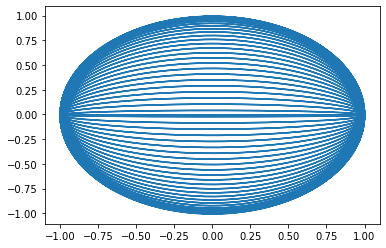

In [25]:

plt.plot(A2D[:, 0], A2D[:, 1])

In [26]:
A2D

matrix([[-1.        , -0.00630201],
        [-0.99949654,  0.02542593],
        [-0.99798668,  0.05712191],
        ...,
        [ 0.99798668,  0.05712191],
        [ 0.99949654,  0.02542593],
        [ 1.        , -0.00630201]])

In [27]:
A2D[:, 0]

matrix([[-1.        ],
        [-0.99949654],
        [-0.99798668],
        ...,
        [ 0.99798668],
        [ 0.99949654],
        [ 1.        ]])

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
A2D = pca.fit_transform(A)

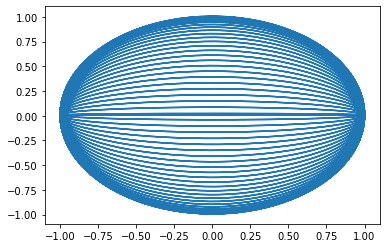

In [29]:
plt.plot(A2D[:, 0], A2D[:, 1])

In [30]:
pca.explained_variance_ratio_

array([0.50502006, 0.24994521])

## Exercises

### 9) Random Forest Test: How does classifier perform when dimensionality reduction applied?

In [31]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [69]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6.0, random_state=42)

In [70]:
np.ptp(y_train)

9

In [73]:
%%time
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

CPU times: user 25.3 s, sys: 35.6 ms, total: 25.3 s
Wall time: 25.4 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
del clf
del clf_r

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(clf, X_train, y_train, cv=3)

array([0.94409874, 0.94373586, 0.9420901 ])

### Now with PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=1/6.0, random_state=42)

In [78]:
X_train.shape

(58333, 154)

In [79]:
X.shape

(70000, 784)

In [80]:
%%time
clf_r = RandomForestClassifier()
clf_r.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 20.1 ms, total: 1min 12s
Wall time: 1min 12s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
cross_val_score(clf_r, X_train, y_train, cv=3)

array([0.94168167, 0.94281012, 0.94039292])

### 10) t-SNE, reduce MNIST to 2D, then plot with matplotlib

In [82]:
from sklearn.manifold import TSNE

In [83]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(70000, 2)

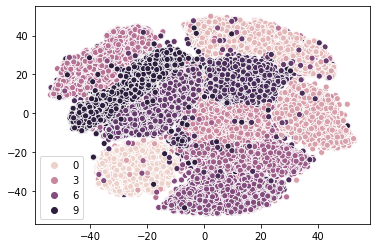

In [89]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y)

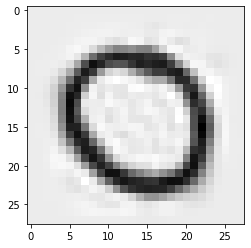

In [159]:
plt.imshow(X_recovered[3000].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")

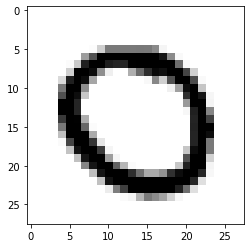

In [160]:
plt.imshow(X[3000].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")